## Assignment- Advanced Regression


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house

How well those variables describe the price of a house

## 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
house = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Data Exploration

In [4]:
house.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
# summary of the dataset: 1460 rows, 81 columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
house.describe()      #other atributes of the dataframe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [9]:
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

Here, although some variables are numeric (int), we'd rather treat them as categorical since they have discrete values.

In [10]:
# dropping the columns we want to treat as categorical variables
house_numeric = house_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


### Outlier Treatment

In [11]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


(1453, 81)

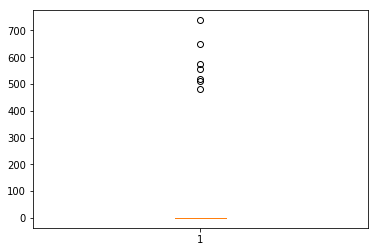

In [12]:
# outlier treatment
plt.boxplot(house['PoolArea'])
Q1 = house['PoolArea'].quantile(0.1)
Q3 = house['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (house['PoolArea'] <= Q3 + 1.5*IQR)]
house.shape

(1402, 81)

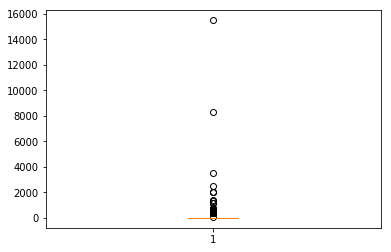

In [13]:
# outlier treatment
plt.boxplot(house['MiscVal'])
Q1 = house['MiscVal'].quantile(0.1)
Q3 = house['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house['MiscVal'] <= Q3 + 1.5*IQR)]
house.shape

(1291, 81)

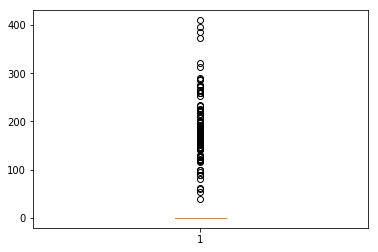

In [14]:
# outlier treatment
plt.boxplot(house['ScreenPorch'])
Q1 = house['ScreenPorch'].quantile(0.1)
Q3 = house['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (house['ScreenPorch'] <= Q3 + 1.5*IQR)]
house.shape

(1274, 81)

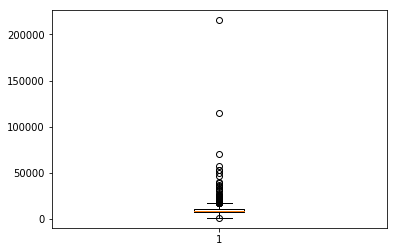

In [15]:
# outlier treatment
plt.boxplot(house['LotArea'])
Q1 = house['LotArea'].quantile(0.1)
Q3 = house['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house['LotArea'] <= Q3 + 1.5*IQR)]
house.shape

(1255, 81)

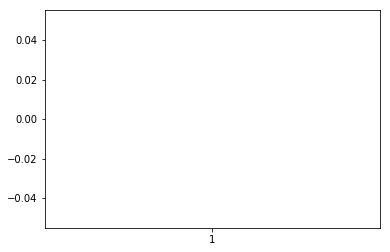

In [16]:
# outlier treatment
plt.boxplot(house['MasVnrArea'])
Q1 = house['MasVnrArea'].quantile(0.1)
Q3 = house['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (house['MasVnrArea'] <= Q3 + 1.5*IQR)]
house.shape

(1253, 81)

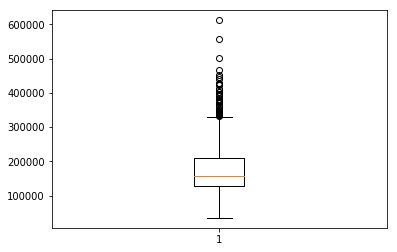

In [17]:
# outlier treatment
plt.boxplot(house['SalePrice'])
Q1 = house['SalePrice'].quantile(0.1)
Q3 = house['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house['SalePrice'] <= Q3 + 1.5*IQR)]
house.shape

## Checking the Correlation between the variables

In [18]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


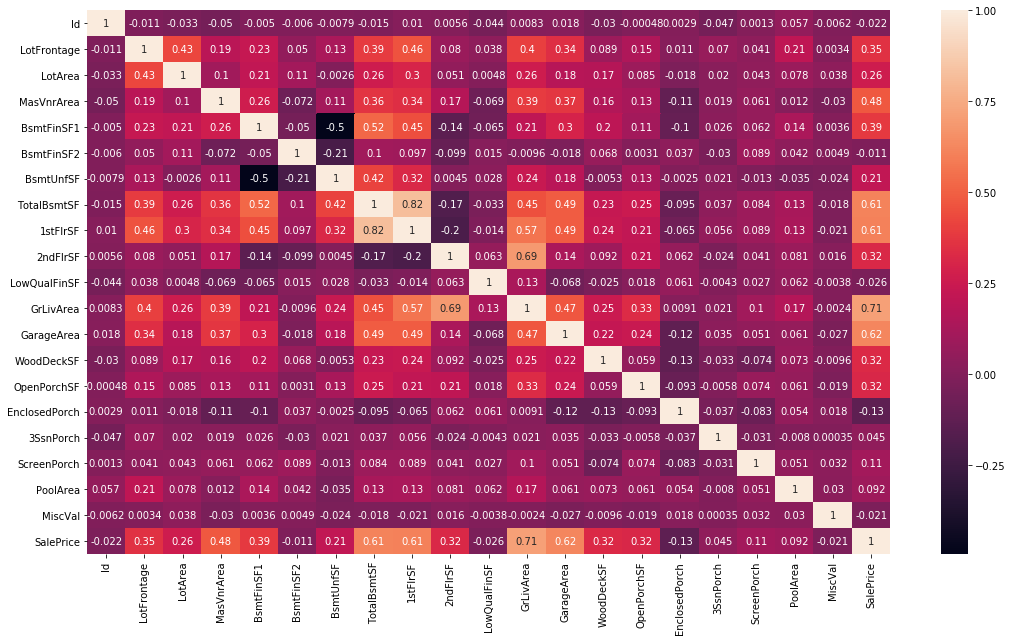

In [19]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()


## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are some missing values in the dataset. We've also seen that variables are in the correct format, except some variables with distinct values, which should rather be categorical variables (so that dummy variable are created for the categories).

In [20]:
# variable formats
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
Id               1253 non-null int64
MSSubClass       1253 non-null int64
MSZoning         1253 non-null object
LotFrontage      1040 non-null float64
LotArea          1253 non-null int64
Street           1253 non-null object
Alley            82 non-null object
LotShape         1253 non-null object
LandContour      1253 non-null object
Utilities        1253 non-null object
LotConfig        1253 non-null object
LandSlope        1253 non-null object
Neighborhood     1253 non-null object
Condition1       1253 non-null object
Condition2       1253 non-null object
BldgType         1253 non-null object
HouseStyle       1253 non-null object
OverallQual      1253 non-null int64
OverallCond      1253 non-null int64
YearBuilt        1253 non-null int64
YearRemodAdd     1253 non-null int64
RoofStyle        1253 non-null object
RoofMatl         1253 non-null object
Exterior1st      1253 non-n

In [21]:
house.isnull().sum()  #checking the number of null values in the dataset

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       213
LotArea             0
Street              0
Alley            1171
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       632
GarageType         78
GarageYrBlt        78
GarageFinish       78
GarageCars          0
GarageArea          0
GarageQual         78
GarageCond         78
PavedDrive

In [22]:
# Checking the percentage of missing values
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                 0.00
MSSubClass         0.00
MSZoning           0.00
LotFrontage       17.00
LotArea            0.00
Street             0.00
Alley             93.46
LotShape           0.00
LandContour        0.00
Utilities          0.00
LotConfig          0.00
LandSlope          0.00
Neighborhood       0.00
Condition1         0.00
Condition2         0.00
BldgType           0.00
HouseStyle         0.00
OverallQual        0.00
OverallCond        0.00
YearBuilt          0.00
YearRemodAdd       0.00
RoofStyle          0.00
RoofMatl           0.00
Exterior1st        0.00
Exterior2nd        0.00
MasVnrType         0.00
MasVnrArea         0.00
ExterQual          0.00
ExterCond          0.00
Foundation         0.00
                  ...  
BedroomAbvGr       0.00
KitchenAbvGr       0.00
KitchenQual        0.00
TotRmsAbvGrd       0.00
Functional         0.00
Fireplaces         0.00
FireplaceQu       50.44
GarageType         6.23
GarageYrBlt        6.23
GarageFinish       6.23
GarageCars      

## Null value treatment
Instead of dropping the null values which will result in a data loss, we will impute the null values according to the domain understanding and the data dictionary provided with the data.

In [23]:
house.shape

(1253, 81)

In [24]:
house = pd.concat((house,test))

In [25]:
#NA in Alley column means No Alley, so we will replace NA by it.
house['Alley'].fillna('No Alley', inplace=True)

In [26]:
house['MasVnrType'].fillna('None', inplace=True) 

In [27]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
house['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [28]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
house['PoolQC'].fillna('No Pool', inplace=True) 

In [29]:
#NA in Fence column means No Fence, so we will replace NA by it.
house['Fence'].fillna('No Fence', inplace=True) 

In [30]:
house['MasVnrArea'].fillna(0, inplace=True) 

In [31]:
house['LotFrontage'].fillna(0, inplace=True) 

In [32]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True) 

In [33]:
# MiscFeature column has almost 99% null values so we will drop it
house= house.drop('MiscFeature', axis=1)

In [34]:
house.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley               0
BedroomAbvGr        0
BldgType            0
BsmtCond           79
BsmtExposure       79
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       76
BsmtFinType2       77
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           78
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence               0
FireplaceQu         0
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotFrontage         0
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea          0
MasVnrType          0
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

In [35]:
#converting year to number of years
house['YearBuilt'] = 2019 - house['YearBuilt']
house['YearRemodAdd'] = 2019 - house['YearRemodAdd']
house['GarageYrBlt'] = 2019 - house['GarageYrBlt']
house['YrSold'] = 2019 - house['YrSold']

In [36]:
#converting from int type to object to treat the variables as categorical variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [37]:
house.shape

(2712, 80)

In [38]:
final = house

## Dummy Variables

In [39]:
# List of variables to map

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
final[varlist1] = final[varlist1].apply(binary_map)

In [40]:
# List of variables to map

varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
final[varlist2] = final[varlist2].apply(binary_map)

In [41]:
# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
final[varlist3] = final[varlist3].apply(binary_map)

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [42]:
# split into X and y
X = final.drop([ 'Id'], axis=1)


In [43]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()


,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSSubClass,MSZoning,MasVnrType,Neighborhood,OverallCond,OverallQual,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,TotRmsAbvGrd
0,No Alley,3,1Fam,TA,No,GLQ,Unf,1,0,Gd,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,No Fence,No Fireplace,0,PConc,2,Typ,2,TA,RFn,TA,Attchd,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,Inside,Reg,60,RL,BrkFace,CollgCr,5,7,Y,No Pool,CompShg,Gable,Normal,WD,8
1,No Alley,3,1Fam,TA,Gd,ALQ,Unf,0,1,Gd,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,No Fence,TA,1,CBlock,2,Typ,2,TA,RFn,TA,Attchd,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,FR2,Reg,20,RL,None,Veenker,8,6,Y,No Pool,CompShg,Gable,Normal,WD,6
2,No Alley,3,1Fam,TA,Mn,GLQ,Unf,1,0,Gd,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,No Fence,TA,1,PConc,2,Typ,2,TA,RFn,TA,Attchd,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,Inside,IR1,60,RL,BrkFace,CollgCr,5,7,Y,No Pool,CompShg,Gable,Normal,WD,6
3,No Alley,3,1Fam,Gd,No,ALQ,Unf,1,0,TA,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,No Fence,Gd,1,BrkTil,1,Typ,3,TA,Unf,TA,Detchd,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,Corner,IR1,70,RL,None,Crawfor,5,7,Y,No Pool,CompShg,Gable,Abnorml,WD,7
4,No Alley,4,1Fam,TA,Av,GLQ,Unf,1,0,Gd,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,No Fence,TA,1,PConc,2,Typ,3,TA,RFn,TA,Attchd,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,FR2,IR1,60,RL,BrkFace,NoRidge,5,8,Y,No Pool,CompShg,Gable,Normal,WD,9


In [44]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,Alley_No Alley,Alley_Pave,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Condition1_Feedr,Condition1_Norm,Condition1_PosA,...,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_No Pool,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_14,TotRmsAbvGrd_15
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
# drop categorical variables 
final = final.drop(list(house_categorical.columns), axis=1)

In [46]:
# concat dummy variables with X
final = pd.concat([final, house_dummies], axis=1)

In [47]:
final.shape

(2712, 310)

In [48]:
test = final.tail(1459)

In [49]:
test.shape

(1459, 310)

In [50]:
X = final.head(1253)
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1) # take out the target variable

In [51]:
test = test.fillna(test.interpolate())


In [52]:
X = X.fillna(X.interpolate())

In [53]:
test = test.drop("SalePrice",1) # take out the target variable

In [54]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 4. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [57]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [58]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-0.07490651848439185


In [59]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041717,0.064648,0.001982,0.000531,0.0001,{'alpha': 0.0001},-0.106722,-0.119848,-0.089229,-0.085269,-0.077307,-0.095715,0.015459,27,-0.045618,-0.047581,-0.049081,-0.047075,-0.051939,-0.048259,0.002147
1,0.009380,0.000208,0.001668,0.000046,0.001,{'alpha': 0.001},-0.106177,-0.119162,-0.089101,-0.085814,-0.076296,-0.095349,0.015353,26,-0.045652,-0.047616,-0.049088,-0.047117,-0.051996,-0.048294,0.002152
2,0.009144,0.000121,0.001619,0.000042,0.01,{'alpha': 0.01},-0.102241,-0.115056,-0.088245,-0.087555,-0.072643,-0.093183,0.014417,24,-0.046094,-0.047799,-0.049155,-0.047373,-0.052419,-0.048568,0.002159
3,0.101280,0.043782,0.002511,0.000756,0.05,{'alpha': 0.05},-0.095834,-0.102654,-0.086903,-0.087117,-0.069682,-0.088463,0.011070,23,-0.047247,-0.048267,-0.049453,-0.047920,-0.053227,-0.049223,0.002126
4,0.009428,0.000234,0.001519,0.000057,0.1,{'alpha': 0.1},-0.093717,-0.095214,-0.086202,-0.086104,-0.067673,-0.085802,0.009797,21,-0.047903,-0.048826,-0.049756,-0.048361,-0.053811,-0.049731,0.002130
5,0.010298,0.001094,0.001480,0.000018,0.2,{'alpha': 0.2},-0.091424,-0.088336,-0.085281,-0.084654,-0.065550,-0.083065,0.009072,19,-0.048640,-0.049755,-0.050201,-0.049023,-0.054556,-0.050435,0.002132
6,0.010285,0.000313,0.001560,0.000132,0.3,{'alpha': 0.3},-0.089766,-0.085078,-0.084593,-0.083647,-0.064539,-0.081538,0.008747,18,-0.049103,-0.050411,-0.050516,-0.049535,-0.055017,-0.050916,0.002118
7,0.009813,0.000429,0.001531,0.000063,0.4,{'alpha': 0.4},-0.088488,-0.083142,-0.084023,-0.082975,-0.063731,-0.080484,0.008603,17,-0.049498,-0.050884,-0.050776,-0.049945,-0.055367,-0.051294,0.002101
8,0.008981,0.000069,0.001479,0.000044,0.5,{'alpha': 0.5},-0.087455,-0.081771,-0.083540,-0.082445,-0.063140,-0.079681,0.008491,16,-0.049862,-0.051254,-0.051020,-0.050285,-0.055650,-0.051614,0.002079
9,0.009252,0.000270,0.001500,0.000028,0.6,{'alpha': 0.6},-0.086593,-0.080721,-0.083121,-0.081975,-0.062761,-0.079045,0.008363,15,-0.050187,-0.051570,-0.051222,-0.050576,-0.055876,-0.051886,0.002052


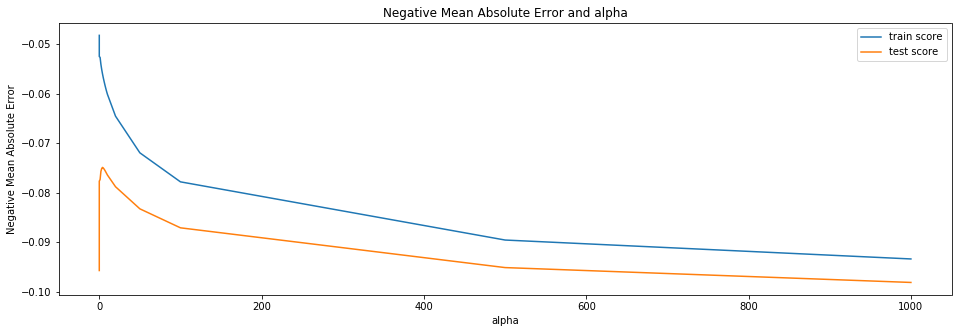

In [60]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### from the above graph and the best_param_ score we got optimum lambda to be 4

In [61]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 7.70920868e-05,  1.14943380e-04,  2.24073414e-04,  5.95430653e-05,
        6.69135804e-05, -2.28352054e-05,  3.77558156e-02,  1.19009185e-04,
        1.35751439e-04,  5.25783543e-04,  1.83714370e-04, -1.08442335e-05,
        8.64982823e-06, -1.29476419e-04, -8.32109922e-06,  2.14798318e-05,
        0.00000000e+00, -1.06780542e-04,  2.24007508e-04,  0.00000000e+00,
        0.00000000e+00, -2.08529167e-02,  1.03621451e-04,  0.00000000e+00,
        1.18398461e-04, -2.80940988e-03, -1.17578887e-03,  3.26827206e-04,
        2.09400529e-02,  3.67571188e-02, -5.60063379e-02,  3.41503768e-02,
        1.96861883e-02,  1.91390164e-02, -1.82613244e-02,  7.35580650e-03,
        0.00000000e+00,  1.03983932e-02, -1.72139518e-02, -4.20853864e-02,
       -1.87975777e-02,  3.96118781e-02, -2.54676639e-02,  3.27929108e-02,
        5.32434388e-02, -8.92678940e-03, -6.70688801e-03, -1.08950382e-02,
        2.00908082e-02, -3.07409353e-02, -5.29623266e-03, -3.64058623e-04,
       -4.64309413e-02, -

In [62]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9543534179988408


## Lasso

In [63]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.706835,0.075721,0.001937,0.000017,0.0001,{'alpha': 0.0001},-0.084352,-0.075181,-0.080514,-0.080684,-0.061001,-0.076354,0.008206,1,-0.051724,-0.052962,-0.052803,-0.052213,-0.057217,-0.053384,0.001967
1,0.707582,0.004905,0.001959,0.000076,0.001,{'alpha': 0.001},-0.083512,-0.082245,-0.086239,-0.081683,-0.066465,-0.080035,0.006955,2,-0.066716,-0.067697,-0.065153,-0.068256,-0.070302,-0.067625,0.001703
2,0.652279,0.002422,0.001909,0.000039,0.01,{'alpha': 0.01},-0.102970,-0.103804,-0.107637,-0.104643,-0.086293,-0.101075,0.007546,3,-0.096992,-0.096702,-0.095088,-0.097794,-0.101146,-0.097544,0.002004
3,0.281209,0.016882,0.002091,0.000162,0.05,{'alpha': 0.05},-0.104351,-0.107559,-0.110148,-0.107681,-0.088994,-0.103752,0.007595,4,-0.100371,-0.099105,-0.097852,-0.100035,-0.104117,-0.100296,0.002101
4,0.122906,0.012987,0.002011,0.000164,0.1,{'alpha': 0.1},-0.103205,-0.107883,-0.110733,-0.107871,-0.089131,-0.103769,0.007698,5,-0.100776,-0.099209,-0.098086,-0.100237,-0.104429,-0.100547,0.002148
5,0.085538,0.011728,0.002082,0.000021,0.2,{'alpha': 0.2},-0.101568,-0.108673,-0.111764,-0.108049,-0.088946,-0.103803,0.008127,6,-0.101021,-0.099660,-0.098541,-0.100407,-0.104754,-0.100876,0.002108
6,0.085272,0.016256,0.002104,0.000033,0.3,{'alpha': 0.3},-0.101584,-0.109311,-0.112660,-0.108296,-0.089277,-0.104228,0.008287,7,-0.101679,-0.100169,-0.099247,-0.100871,-0.105317,-0.101457,0.002090
7,0.069907,0.011708,0.002138,0.000056,0.4,{'alpha': 0.4},-0.102173,-0.110006,-0.113644,-0.108581,-0.090011,-0.104886,0.008302,8,-0.102410,-0.100863,-0.100099,-0.101606,-0.106039,-0.102203,0.002066
8,0.062415,0.008850,0.002080,0.000030,0.5,{'alpha': 0.5},-0.102911,-0.110757,-0.114792,-0.108588,-0.091152,-0.105643,0.008190,9,-0.103282,-0.101750,-0.101226,-0.102401,-0.106905,-0.103113,0.002017
9,0.054897,0.005581,0.002062,0.000033,0.6,{'alpha': 0.6},-0.103792,-0.111571,-0.116404,-0.108544,-0.092588,-0.106582,0.008102,10,-0.104246,-0.102736,-0.102435,-0.103306,-0.107884,-0.104121,0.001980


In [65]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [66]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.702477,0.071829,0.002079,0.000086,0.0001,{'alpha': 0.0001},0.908156,0.898751,0.918733,0.895582,0.944807,0.913183,0.017731,1,0.963687,0.963594,0.959524,0.963947,0.957308,0.961612,0.002705
1,0.705952,0.005287,0.002182,0.000284,0.001,{'alpha': 0.001},0.915175,0.896814,0.905318,0.905102,0.933450,0.911160,0.012562,2,0.937313,0.940183,0.936955,0.938495,0.935028,0.937595,0.001708
2,0.654825,0.002706,0.002062,0.000088,0.01,{'alpha': 0.01},0.879710,0.835407,0.860760,0.833450,0.869569,0.855783,0.018455,3,0.862385,0.870384,0.865894,0.871293,0.865293,0.867050,0.003326
3,0.280482,0.015770,0.002074,0.000082,0.05,{'alpha': 0.05},0.875663,0.823168,0.852324,0.826194,0.858286,0.847132,0.019907,5,0.850680,0.863089,0.856741,0.863428,0.856414,0.858071,0.004755
4,0.119110,0.010205,0.002034,0.000143,0.1,{'alpha': 0.1},0.877619,0.822466,0.850625,0.827309,0.857963,0.847203,0.020319,4,0.849463,0.862733,0.856127,0.862245,0.855417,0.857197,0.004905
5,0.085559,0.011150,0.002189,0.000029,0.2,{'alpha': 0.2},0.880089,0.819677,0.847706,0.827920,0.857025,0.846491,0.021496,6,0.847977,0.861688,0.854952,0.861123,0.854404,0.856029,0.005032
6,0.086801,0.017436,0.002215,0.000088,0.3,{'alpha': 0.3},0.880835,0.816847,0.844558,0.828038,0.855823,0.845228,0.022306,7,0.845631,0.860278,0.853112,0.859444,0.852845,0.854262,0.005308
7,0.069966,0.011626,0.002178,0.000047,0.4,{'alpha': 0.4},0.880538,0.813341,0.840926,0.827521,0.853906,0.843255,0.023058,8,0.843441,0.858303,0.850934,0.857345,0.850959,0.852196,0.005359
8,0.062688,0.007769,0.002151,0.000028,0.5,{'alpha': 0.5},0.879741,0.809362,0.836625,0.827554,0.851204,0.840905,0.023722,9,0.840717,0.855870,0.848187,0.855327,0.848549,0.849730,0.005550
9,0.054938,0.005470,0.002155,0.000021,0.6,{'alpha': 0.6},0.878520,0.806004,0.831940,0.827790,0.847765,0.838413,0.024123,10,0.837544,0.853595,0.845068,0.853129,0.845598,0.846987,0.005936


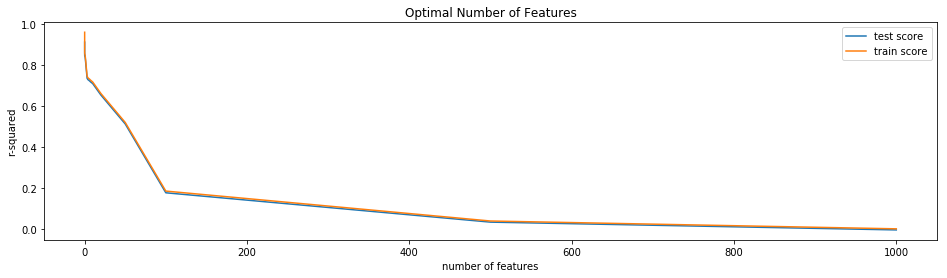

In [67]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [68]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.07635395362872564


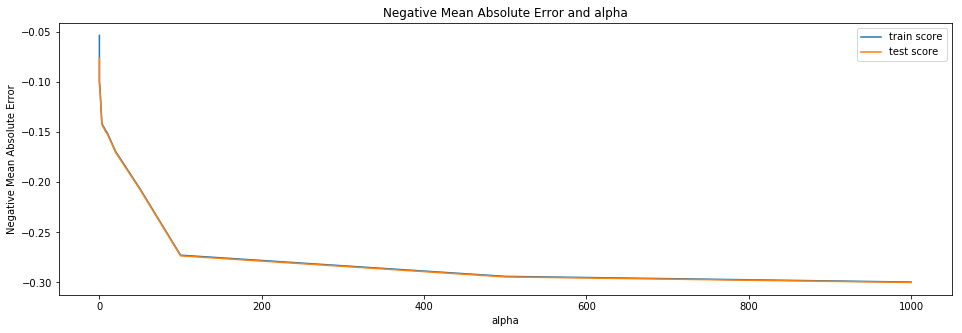

In [69]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### from the above graph and the best_param_ score we got optimum lambda to be 0.0001

In [70]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))


0.9575118209401147


In [72]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.8821331602296406


In [74]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.019978070591532927


In [75]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
preds = lasso.predict(test)
final_predictions = np.exp(preds)

In [76]:
test.index = test.index + 1461

In [77]:
submission = pd.DataFrame({'Id': test.index ,'SalePrice': final_predictions })


In [78]:
submission.to_csv("submission.csv",index=False)

predictions using ridge

In [79]:
alpha = 4

ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
preds1 = ridge.predict(test)
final_predictions1 = np.exp(preds1)

In [80]:
submission1 = pd.DataFrame({'Id': test.index ,'SalePrice': final_predictions1 })


In [81]:
submission1.to_csv("submission1.csv",index=False)